In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'module3-make-explanatory-visualizations'))
	#print(os.getcwd())
except:
	pass

 # ASSIGNMENT

 ### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

 Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

 Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

 ### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

 **WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib.

 - If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought.

 - If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [2]:
from IPython.display import display, Image
import pandas

df = pandas.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)


In [3]:
votes = df.tail(1).loc[80052,'1_votes':'10_votes']
votes_percent = votes/votes.sum()*100
votes_percent


1_votes      38.3546
2_votes      2.59204
3_votes       1.4275
4_votes     0.939144
5_votes      2.06612
6_votes      4.13223
7_votes      5.78512
8_votes      5.52216
9_votes       5.4846
10_votes     33.6965
Name: 80052, dtype: object

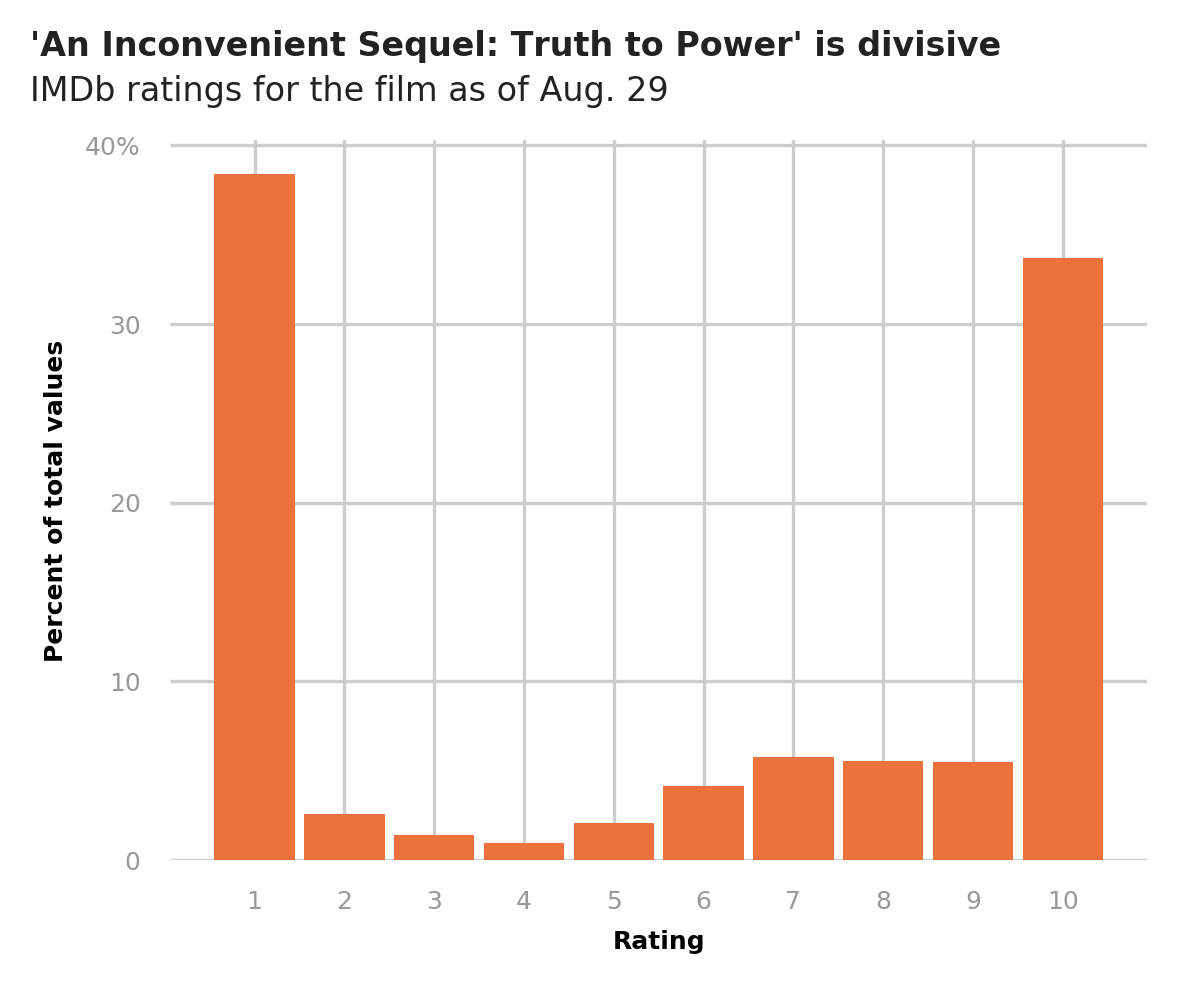

In [4]:
from matplotlib import pyplot

size_px = (1150,960)
dpi = 300
size_in = [i/dpi for i in size_px]
bar_color = '#ED713A'#(237, 113, 58)
tick_color = '#999999'#(153, 153, 153)
grid_color = '#CDCDCD'#(205, 205, 205)
title_color = '#222222'
bar_width_px = 85
bar_width_in = bar_width_px/dpi
bar_divide_px = 10
bar_divide_in = bar_divide_px/dpi
bar_width_rel = bar_width_px/(bar_width_px+bar_divide_px)
bar_divide_rel = bar_divide_px/(bar_width_px+bar_divide_px)
subplot_width_px = 960
subplot_width_in = subplot_width_px/dpi
dpimult = 100/dpi

figure = pyplot.figure(figsize=size_in, dpi=dpi)
figure.patch.set(facecolor='None')
subplot = figure.add_subplot(1, 1, 1)
figure.subplots_adjust(top=0.85, bottom=0.1,left=0.15,right=1.0)
subplot.patch.set(facecolor='None')
for spine in subplot.spines:
	subplot.spines[spine].set_visible(False)

subplot.grid(color=grid_color)

subplot.bar(range(1,11),votes_percent,width=bar_width_rel,color=bar_color, zorder=20)

title_font = {'color': title_color,
			'weight': 700,
			'size': int(26*dpimult)}
subtitle_font = {'color': title_color,
			'size': int(24*dpimult)}
label_font = {'color': 'black',
			'weight': 700,
			'size': int(20*dpimult)}
tick_font = {'color': tick_color,
			'size': int(20*dpimult)}
subplot.text(-1.5,45,'\'An Inconvenient Sequel: Truth to Power\' is divisive', fontdict=title_font)
subplot.text(-1.5,42.5,'IMDb ratings for the film as of Aug. 29', fontdict=subtitle_font)

xaxis = subplot.xaxis
xaxis.set_label_text('Rating', fontdict=label_font)
yaxis = subplot.yaxis
yaxis.set_label_text('Percent of total values', fontdict=label_font)

subplot.set_xticks(range(1,11))
subplot.set_xticklabels(range(1,11), fontdict=tick_font)
subplot.set_yticks(range(0,50,10))
subplot.set_yticklabels(list(range(0,40,10))+['40%'], fontdict=tick_font)

figure.savefig('rebuilt.png', transparent=True)
pyplot.show()


 # Scrabble score histograms
 From https://fivethirtyeight.com/features/how-qi-and-za-changed-scrabble/

In [5]:
df_scrabble = pandas.read_csv('https://github.com/fivethirtyeight/data/blob/master/scrabble-games/scrabble_games.csv?raw=true')

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/04/roeder-scrabble-1.png'
example = Image(url=url, width=400)

display(example)


In [6]:
# Drop zero values in score columns
# While it is, technically, possible to score zero
# It's certainly not the case for > 500,000 games
import numpy
df_scrabble['winnerscore'].replace(0,numpy.NaN,inplace=True)
df_scrabble['loserscore'].replace(0,numpy.NaN,inplace=True)
df_scrabble.dropna(inplace=True)



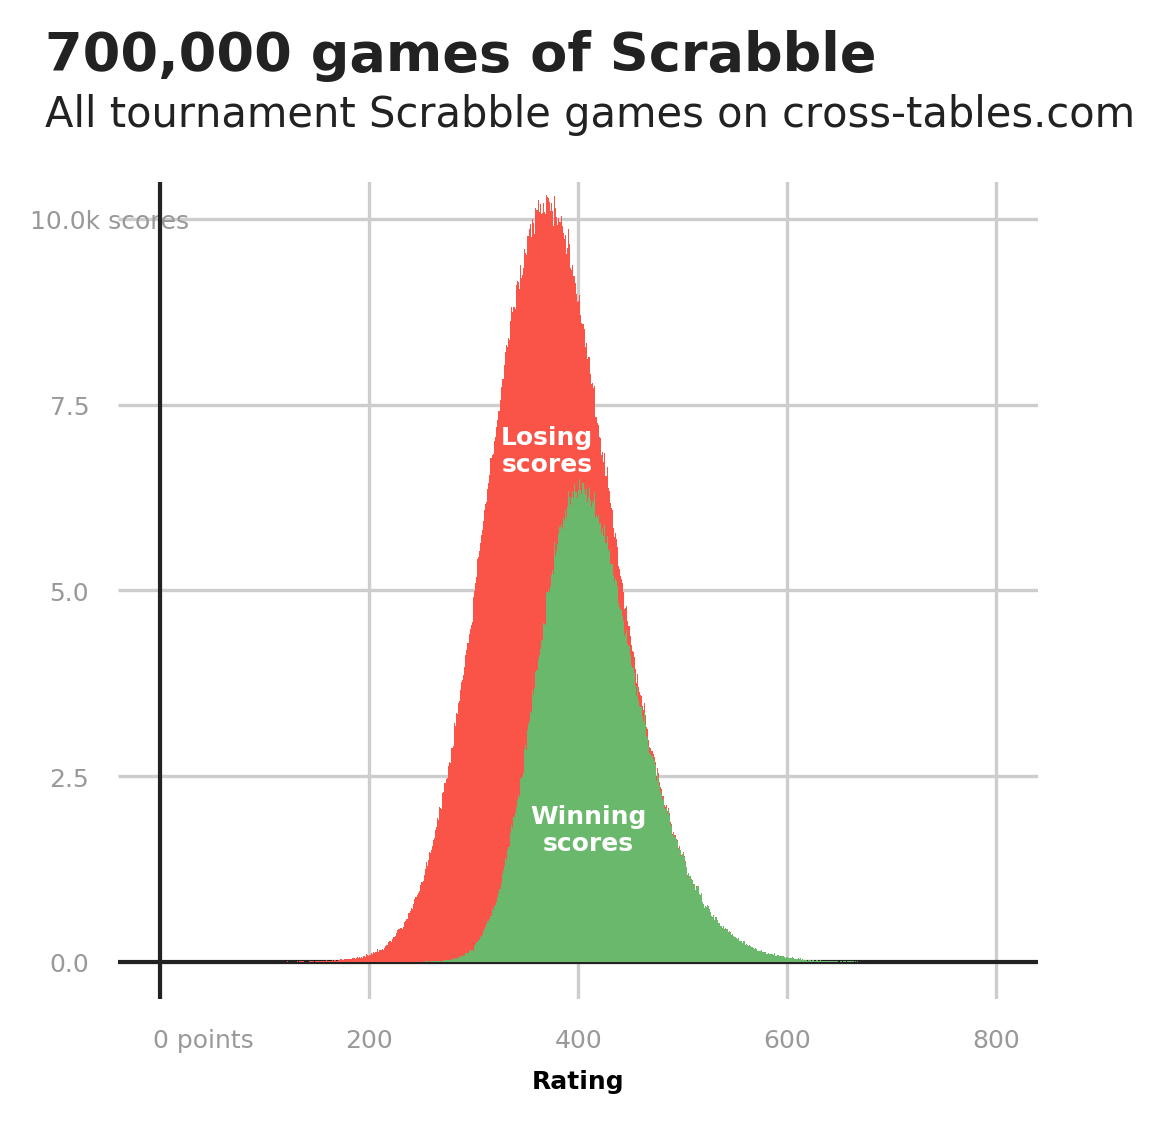

In [7]:
import matplotlib.transforms as transforms
#df_scrabble.describe()

size_px = (1150,1090)
dpi = 300
size_in = [i/dpi for i in size_px]
#bar_color = '#ED713A'#(237, 113, 58)
tick_color = '#999999'#(153, 153, 153)
grid_color = '#CDCDCD'#(205, 205, 205)
title_color = '#222222'
axis_color = title_color
loser_color = '#FA5347'
loser_color_t = '#FF5448FA'
winner_color = '#6AB86B'
winner_color_t = '#6DBD6DFA'
# bar_width_px = 10
# bar_width_in = bar_width_px/dpi
# bar_divide_px = 10
# bar_divide_in = bar_divide_px/dpi
# bar_width_rel = bar_width_px/(bar_width_px+bar_divide_px)
# bar_divide_rel = bar_divide_px/(bar_width_px+bar_divide_px)
subplot_width_px = 960
subplot_width_in = subplot_width_px/dpi
dpimult = 100/dpi

figure = pyplot.figure(figsize=size_in, dpi=dpi)
figure.patch.set(facecolor='None')
subplot = figure.add_subplot(1, 1, 1)
figure.subplots_adjust(top=0.85, bottom=0.1,left=0.1,right=0.9)
subplot.patch.set(facecolor='None')
for spine in subplot.spines:
	subplot.spines[spine].set_visible(False)
# subplot.spines['right'].set_visible(False)
# subplot.spines['top'].set_visible(False)

subplot.grid(color=grid_color)

bins = range(800)
subplot.hist(df_scrabble['loserscore'].append(df_scrabble['winnerscore']),bins=bins,color=loser_color, zorder=25)
subplot.hist(df_scrabble['winnerscore'],bins=bins,color=winner_color, zorder=30)
#subplot.bar(range(1,11),votes_percent,width=bar_width_rel,color=bar_color)

title_font = {'color': title_color,
			'weight': 700,
			'size': int(40*dpimult)}
subtitle_font = {'color': title_color,
			'size': int(32*dpimult)}
label_font = {'color': 'black',
			'weight': 700,
			'size': int(20*dpimult)}
tick_font = {'color': tick_color,
			'size': int(20*dpimult)}
inline_label_font = {'color': 'white',
			'weight': 700,
			'horizontalalignment': 'center',
			'size': int(20*dpimult)}
subplot.text(-110, 12000, '700,000 games of Scrabble', fontdict=title_font)
subplot.text(-110, 11250, 'All tournament Scrabble games on cross-tables.com', fontdict=subtitle_font)

subplot.xaxis.set_label_text('Rating', fontdict=label_font)

subplot.set_xlim(left=-40, right=840)
subplot.set_xticks(range(0,1000,200))
# subplot.set_xticklabels(range(1,11), fontdict=tick_font)
subplot.set_xticklabels(['0 points']+list(range(200,1000,200)), fontdict=tick_font)
zeroxTick = subplot.get_xticklabels()[0]
zeroxTickTransform = transforms.ScaledTranslation(31/72*dpimult,0,figure.dpi_scale_trans)
zeroxTick.set_transform(zeroxTick.get_transform()+zeroxTickTransform)

subplot.set_yticks(range(0,12500,2500))
subplot.set_ylim(bottom=-500, top=10500)
subplot.set_yticklabels([i/4 for i in range(0,40,10)]+['10.0k scores'], fontdict=tick_font)
tenkyTick = subplot.get_yticklabels()[-1]
tenkyTickTransform = transforms.ScaledTranslation(72/72*dpimult,0,figure.dpi_scale_trans)
tenkyTick.set_transform(tenkyTick.get_transform()+tenkyTickTransform)

subplot.text(370,6600,'Losing\nscores', fontdict=inline_label_font, zorder=67)
subplot.text(410,1500,'Winning\nscores', fontdict=inline_label_font, zorder=67)

subplot.axhline(y=0, color=axis_color, lw=1)
subplot.axvline(x=0, color=axis_color, lw=1)

figure.savefig('rebuilt_scrabble.png', transparent=True)
pyplot.show()


 # STRETCH OPTIONS

 ### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

 - [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/)
 - [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/)
 - or another example of your choice!

 ### 2) Make more charts!

 Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

 Find the chart in an example gallery of a Python data visualization library:
 - [Seaborn](http://seaborn.pydata.org/examples/index.html)
 - [Altair](https://altair-viz.github.io/gallery/index.html)
 - [Matplotlib](https://matplotlib.org/gallery.html)
 - [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

 Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

 Take notes. Consider sharing your work with your cohort!

In [8]:
# More Work Here



